
# **Cardiovascular Disease Risk Prediction Dataset**


*Importing all the important libraries to the collab*

In [8]:
#Pandas is used to manipulaye the data and for analysis
# numpy were used to numerical calculations
#matplotlib and seaborn are used to create static, animated, and interactive visualization
!pip install pandas numpy matplotlib seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read Dataset

In [4]:
#read the csv file loan-train.csv by read_csv
import pandas as pd
data = pd.read_csv('/content/healthcare_synthetic_data.csv')
#it prints the rows and  columns of the dataset
data.shape

(15000, 16)

In [ ]:
data.head(1)

,Age,Gender,BMI,Systolic_BP,Diastolic_BP,Cholesterol_Total,Cholesterol_LDL,Cholesterol_HDL,Fasting_Blood_Sugar,Smoking_Status,Alcohol_Consumption,Physical_Activity_Level,Family_History,Stress_Level,Sleep_Hours,Heart_Disease_Risk
0,60,0,23.8,140,89,217,151,52,83,0,1,3,0,1,8,0


In [ ]:
# it prints heads of the columns
data.columns

Index(['Age', 'Gender', 'BMI', 'Systolic_BP', 'Diastolic_BP',
       'Cholesterol_Total', 'Cholesterol_LDL', 'Cholesterol_HDL',
       'Fasting_Blood_Sugar', 'Smoking_Status', 'Alcohol_Consumption',
       'Physical_Activity_Level', 'Family_History', 'Stress_Level',
       'Sleep_Hours', 'Heart_Disease_Risk'],
      dtype='object')

In [ ]:
#info is used to retrieve the information about the data's from the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      15000 non-null  int64  
 1   Gender                   15000 non-null  int64  
 2   BMI                      15000 non-null  float64
 3   Systolic_BP              15000 non-null  int64  
 4   Diastolic_BP             15000 non-null  int64  
 5   Cholesterol_Total        15000 non-null  int64  
 6   Cholesterol_LDL          15000 non-null  int64  
 7   Cholesterol_HDL          15000 non-null  int64  
 8   Fasting_Blood_Sugar      15000 non-null  int64  
 9   Smoking_Status           15000 non-null  int64  
 10  Alcohol_Consumption      15000 non-null  int64  
 11  Physical_Activity_Level  15000 non-null  int64  
 12  Family_History           15000 non-null  int64  
 13  Stress_Level             15000 non-null  int64  
 14  Sleep_Hours           

In [ ]:
#it prints all the unique values
data.nunique()

,0
Age,61
Gender,2
BMI,274
Systolic_BP,82
Diastolic_BP,61
Cholesterol_Total,161
Cholesterol_LDL,132
Cholesterol_HDL,47
Fasting_Blood_Sugar,97
Smoking_Status,2


In [9]:
 #Missing values calculation
data.isnull().sum()

,0
Age,0
Gender,0
BMI,0
Systolic_BP,0
Diastolic_BP,0
Cholesterol_Total,0
Cholesterol_LDL,0
Cholestrol_HDL,0
Fasting_Blood_Sugar,0
Smoking_Status,0


In [ ]:
#percentage of missing values
(data.isnull().sum()/data.shape[0])*100
# no duplicate values

,0
Age,0.0
Gender,0.0
BMI,0.0
Systolic_BP,0.0
Diastolic_BP,0.0
Cholesterol_Total,0.0
Cholesterol_LDL,0.0
Cholesterol_HDL,0.0
Fasting_Blood_Sugar,0.0
Smoking_Status,0.0


# Data  Preprocessing

In [ ]:
#it prints the unique value from the particular column
# In this dataset the  column gander have the values 0 for male and 1 female
data['Gender'].unique()

In [ ]:
#derive the datatypes of the columns
data.dtypes

,0
Age,int64
Gender,int64
BMI,float64
Systolic_BP,int64
Diastolic_BP,int64
Cholesterol_Total,int64
Cholesterol_LDL,int64
Cholesterol_HDL,int64
Fasting_Blood_Sugar,int64
Smoking_Status,int64


In [4]:
#separating feature variable and target varible
X = data.drop('Heart_Disease_Risk', axis=1)
y = data['Heart_Disease_Risk']

In [5]:
#It calculates the average values of numerical features separately for people with and without heart disease ris
data.groupby("Heart_Disease_Risk").mean()

,Age,Gender,BMI,Systolic_BP,Diastolic_BP,Cholesterol_Total,Cholesterol_LDL,Cholestrol_HDL,Fasting_Blood_Sugar,Smoking_Status,Alcohol_Consumption,Physical_Activity_Level,Family_History,Stress_Level,Sleep_Hours
Heart_Disease_Risk,,,,,,,,,,,,,,,
0,52.777305,0.491371,26.964362,133.194917,89.391962,213.569976,138.216076,43.612175,97.534634,0.158274,0.606619,1.426832,0.086407,5.235934,6.538298
1,56.815902,0.492508,28.069220,137.604893,92.027982,219.712232,143.122477,42.914220,102.432722,0.484098,0.600153,1.131193,0.231193,5.850000,6.464373


# **Statistical Implemetation**

In [ ]:
#.describe is used to know how the data(numerical data) is distributed
data.describe()

,Age,Gender,BMI,Systolic_BP,Diastolic_BP,Cholesterol_Total,Cholesterol_LDL,Cholesterol_HDL,Fasting_Blood_Sugar,Smoking_Status,Alcohol_Consumption,Physical_Activity_Level,Family_History,Stress_Level,Sleep_Hours,Heart_Disease_Risk
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,54.538133,0.491867,27.446080,135.117667,90.541267,216.248000,140.355267,43.307867,99.670200,0.300333,0.603800,1.297933,0.149533,5.503667,6.506067,0.436000
std,11.875294,0.499951,4.134953,11.260634,8.443095,22.692222,17.914089,5.963153,15.261355,0.458418,0.668672,0.902380,0.356625,2.874277,1.212626,0.495904
min,25.000000,0.000000,14.500000,90.000000,60.000000,127.000000,70.000000,20.000000,60.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,0.000000
25%,46.000000,0.000000,24.500000,127.000000,85.000000,201.000000,128.000000,39.000000,89.000000,0.000000,0.000000,1.000000,0.000000,3.000000,6.000000,0.000000
50%,55.000000,0.000000,27.200000,135.000000,91.000000,216.000000,140.000000,43.000000,99.000000,0.000000,0.000000,1.000000,0.000000,5.500000,7.000000,0.000000
75%,63.000000,1.000000,30.000000,143.000000,96.000000,231.000000,152.000000,47.000000,110.000000,1.000000,1.000000,2.000000,0.000000,8.000000,7.000000,1.000000
max,85.000000,1.000000,46.100000,182.000000,120.000000,303.000000,210.000000,68.000000,167.000000,1.000000,2.000000,3.000000,1.000000,10.000000,10.000000,1.000000


In [ ]:
data.mean(numeric_only=True)
#It used to calculate the average value for each numerical column in your data DataFrame.
#The numeric_only=True part is important because it tells the function to only consider columns that contain numbers, ignoring any text or other non-numeric data.

,0
Age,54.538133
Gender,0.491867
BMI,27.446080
Systolic_BP,135.117667
Diastolic_BP,90.541267
Cholesterol_Total,216.248000
Cholesterol_LDL,140.355267
Cholesterol_HDL,43.307867
Fasting_Blood_Sugar,99.670200
Smoking_Status,0.300333


In [ ]:
data.median(numeric_only=True)
#calculates the median value for each numerical column in your data DataFrame.
#The median is the middle value in a dataset when it's ordered from least to greatest.
#If there's an even number of values, it's the average of the two middle values.
#Using numeric_only=True ensures that only columns containing numbers are considered for this calculation.

,0
Age,55.0
Gender,0.0
BMI,27.2
Systolic_BP,135.0
Diastolic_BP,91.0
Cholesterol_Total,216.0
Cholesterol_LDL,140.0
Cholesterol_HDL,43.0
Fasting_Blood_Sugar,99.0
Smoking_Status,0.0


In [ ]:
data.groupby("Heart_Disease_Risk").mean()


,Age,Gender,BMI,Systolic_BP,Diastolic_BP,Cholesterol_Total,Cholesterol_LDL,Cholesterol_HDL,Fasting_Blood_Sugar,Smoking_Status,Alcohol_Consumption,Physical_Activity_Level,Family_History,Stress_Level,Sleep_Hours
Heart_Disease_Risk,,,,,,,,,,,,,,,
0,52.777305,0.491371,26.964362,133.194917,89.391962,213.569976,138.216076,43.612175,97.534634,0.158274,0.606619,1.426832,0.086407,5.235934,6.538298
1,56.815902,0.492508,28.069220,137.604893,92.027982,219.712232,143.122477,42.914220,102.432722,0.484098,0.600153,1.131193,0.231193,5.850000,6.464373


# Exploratory Data Analysis

# Univariate analysis

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'Systolic_BP'}>],
       [<Axes: title={'center': 'Diastolic_BP'}>,
        <Axes: title={'center': 'Cholesterol_Total'}>,
        <Axes: title={'center': 'Cholesterol_LDL'}>,
        <Axes: title={'center': 'Cholestrol_HDL'}>],
       [<Axes: title={'center': 'Fasting_Blood_Sugar'}>,
        <Axes: title={'center': 'Smoking_Status'}>,
        <Axes: title={'center': 'Alcohol_Consumption'}>,
        <Axes: title={'center': 'Physical_Activity_Level'}>],
       [<Axes: title={'center': 'Family_History'}>,
        <Axes: title={'center': 'Stress_Level'}>,
        <Axes: title={'center': 'Sleep_Hours'}>,
        <Axes: title={'center': 'Heart_Disease_Risk'}>]], dtype=object)

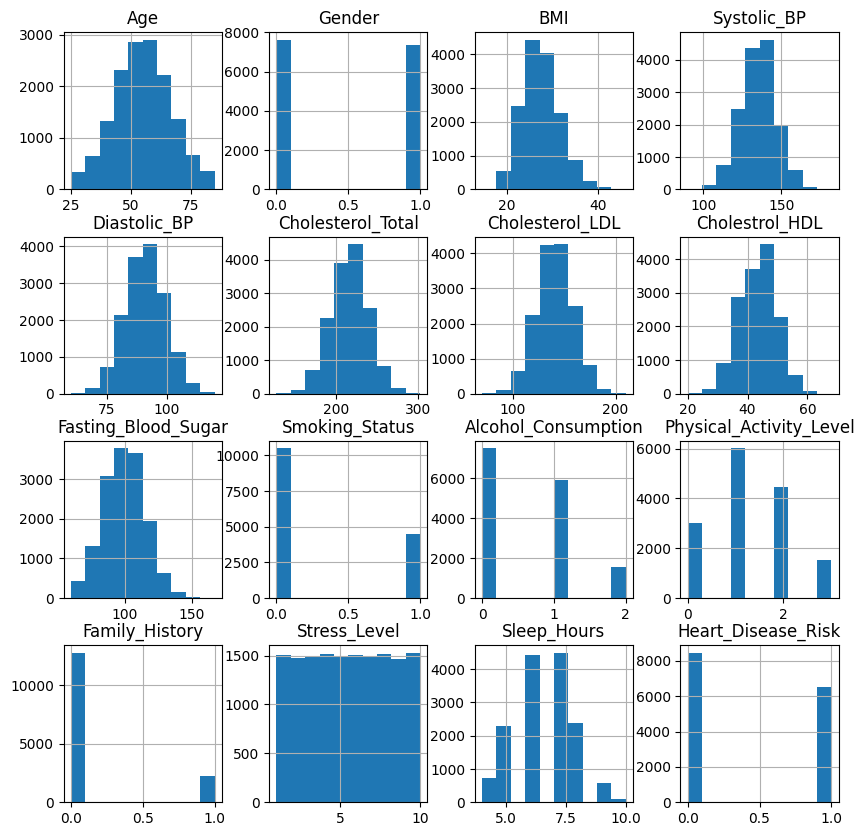

In [6]:
#histogram
data.hist(figsize=(10,10))

<Axes: ylabel='Age'>

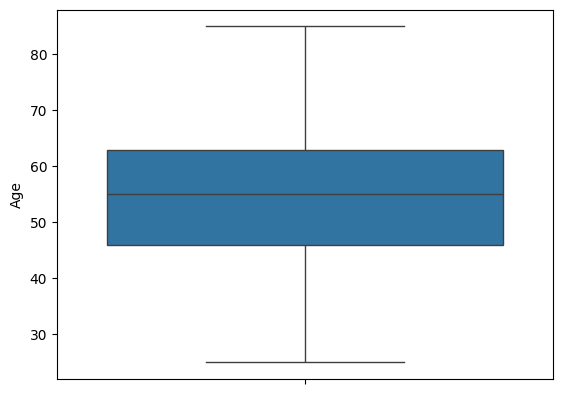

In [13]:
#A box plot (or box-and-whisker plot) is a standardized way of displaying the distribution of data based on a five-number summary: minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum.
# It can also show outliers.
# In this case, it will visualize the distribution of ages within your dataset.
sns.boxplot(y='Age', data=data)

# Bivariate Analysis

<Axes: xlabel='Age_Group', ylabel='count'>

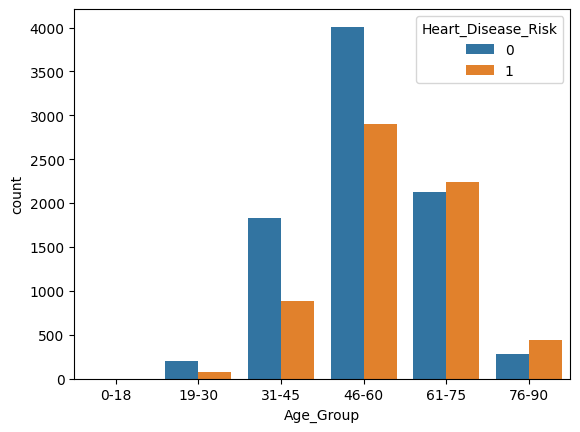

In [16]:
#Bar plot
#Create Age_Group column by binning the 'Age' column
bins = [0, 18, 30, 45, 60, 75, 90]
labels = ['0-18', '19-30', '31-45', '46-60', '61-75', '76-90']
data['Age_Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)
sns.countplot(x='Age_Group', hue='Heart_Disease_Risk', data=data)

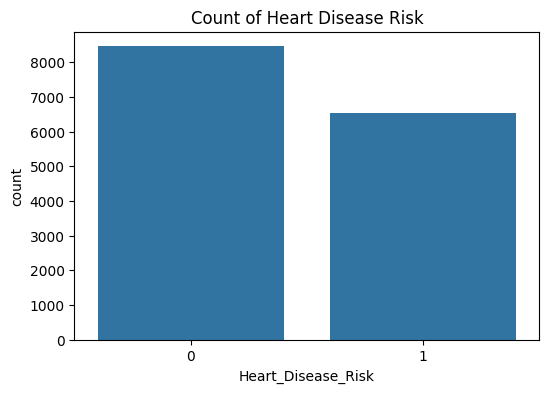

In [11]:
 #occurence of each unique values in Heart_Diseasr_Risk
#0 refers to female and 1 refers to male
plt.figure(figsize=(6,4))
sns.countplot(x='Heart_Disease_Risk', data=data)
plt.title('Count of Heart Disease Risk')
plt.show()

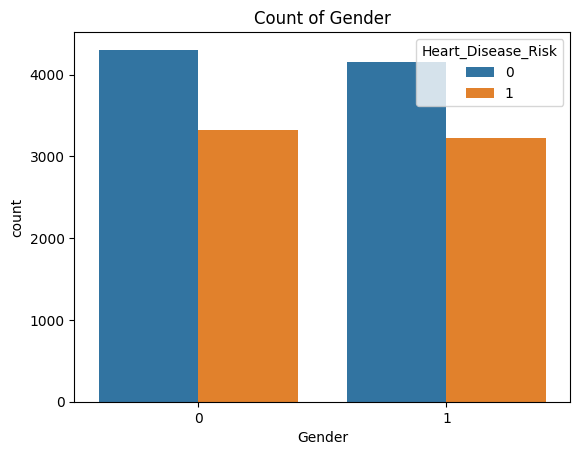

In [ ]:
sns.countplot(x='Gender', hue='Heart_Disease_Risk', data=data)
plt.title('Count of Gender')
plt.show()

# Multivariate Analysis

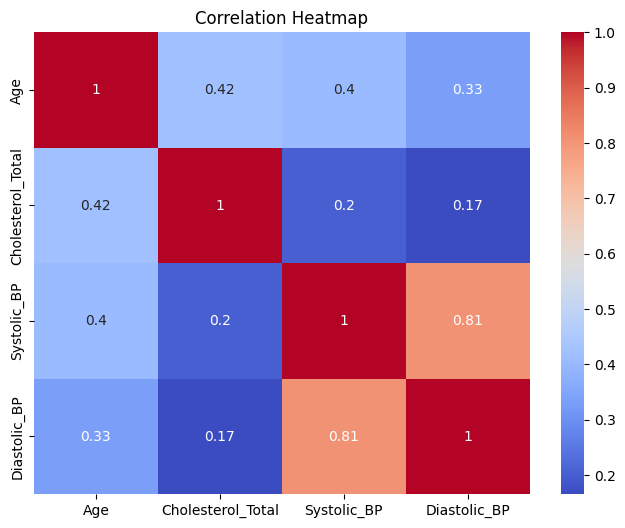

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(
    data[['Age','Cholesterol_Total','Systolic_BP','Diastolic_BP']].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title('Correlation Heatmap')
plt.show()

#HypothesisTesting

In [ ]:
from scipy.stats import chi2_contingency
table = pd.crosstab(data['Gender'], data['Heart_Disease_Risk'])
chi2, p, dof, expected = chi2_contingency(table)
print(p)
#The chi-square test resulted i n a p-value of 0.903, which is greater than the significance level of 0.05
#Hence, the null hypothesis was not rejected, indicating no significant association between gender and heart disease risk.

0.9032186624442844


# Model training

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [17]:
# Separating feature variables (X) and target variable (y)
# Drop 'Heart_Disease_Risk' and 'Age_Group' from features
X = data.drop(columns=['Heart_Disease_Risk', 'Age'], errors='ignore')
y = data['Heart_Disease_Risk']

In [18]:
# Separating feature variables (X) and target variable (y)
# Drop 'Heart_Disease_Risk' (target) and 'Age_Group' (derived feature) from X
X = data.drop(columns=['Heart_Disease_Risk', 'Age_Group'], errors='ignore')
y = data['Heart_Disease_Risk']

In [19]:
X.shape
y.shape


(15000,)

In [21]:
X.columns


Index(['Age', 'Gender', 'BMI', 'Systolic_BP', 'Diastolic_BP',
       'Cholesterol_Total', 'Cholesterol_LDL', 'Cholestrol_HDL',
       'Fasting_Blood_Sugar', 'Smoking_Status', 'Alcohol_Consumption',
       'Physical_Activity_Level', 'Family_History', 'Stress_Level',
       'Sleep_Hours'],
      dtype='object')

# Logistic Regression

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler # Import StandardScaler

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
# Initialize StandardScaler
scaler = StandardScaler()
# Fit on training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Models
lr = LogisticRegression(max_iter=1000,solver='lbfgs') # Increased max_iter already, now with scaling
# Training
print("Training Logistic Regression...")
lr.fit(X_train_scaled, y_train) # Use scaled data
y_pred_lr = lr.predict(X_test_scaled)
print("Logistic Regression trained.")


Training Logistic Regression...
Logistic Regression trained.


In [26]:
lr.score(X_test_scaled, y_test)
print("Logistic Regression score: ", lr.score(X_test_scaled, y_test))

Logistic Regression score:  0.7393333333333333


# Decision Tree

In [51]:
#decision tree
from sklearn.model_selection import train_test_split # Corrected import
dt = DecisionTreeClassifier(random_state=42)
print("Training Decision Tree Classifier...")
dt.fit(X_train_scaled, y_train) # Decision Trees are less sensitive to scaling, but good practice
print("Decision Tree Classifier trained.")
# predicting  accuracy score
y_pred_dt = dt.predict(X_test)
y_pred_dt = dt.predict(X_test_scaled)
print("Decision Tree Accuracy:", dt_acc)

Training Decision Tree Classifier...
Decision Tree Classifier trained.
Decision Tree Accuracy: 0.5596666666666666


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


# Random-Classifer

In [44]:
rf = RandomForestClassifier(random_state=42)
print("Training Random Forest Classifier...")
rf.fit(X_train_scaled, y_train) # Random Forests are less sensitive to scaling, but good practice print("Random Forest Classifier trained.")
#Predicting Accuracy Scroe of Random Classifier
from sklearn.metrics import accuracy_score
y_pred = rf.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", acc)
# 1. Check class distribution
print(y_train.value_counts())
print(y_test.value_counts())
# 2. Use class_weight for Random Forest
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)
rf.predict(X_test_scaled)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


Training Random Forest Classifier...
Random Forest Accuracy: 0.7216666666666667
Heart_Disease_Risk
0    6768
1    5232
Name: count, dtype: int64
Heart_Disease_Risk
0    1692
1    1308
Name: count, dtype: int64
              precision    recall  f1-score   support

           0       0.73      0.82      0.77      1692
           1       0.72      0.61      0.66      1308

    accuracy                           0.73      3000
   macro avg       0.73      0.71      0.72      3000
weighted avg       0.73      0.73      0.72      3000



# Model selection & Comparison

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[1361  331]
 [ 504  804]]


In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print("Decision Tree Report:\n", classification_report(y_test, dt.predict(X_test)))
print("Random Forest Report:\n", classification_report(y_test, rf.predict(X_test)))
print("Logistic Regression Report:\n", classification_report(y_test, lr.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.73      0.82      0.77      1692
           1       0.72      0.61      0.66      1308

    accuracy                           0.73      3000
   macro avg       0.73      0.71      0.72      3000
weighted avg       0.73      0.73      0.72      3000

Decision Tree Report:
               precision    recall  f1-score   support

           0       0.59      0.71      0.64      1692
           1       0.49      0.37      0.42      1308

    accuracy                           0.56      3000
   macro avg       0.54      0.54      0.53      3000
weighted avg       0.55      0.56      0.55      3000



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Random Forest Report:
               precision    recall  f1-score   support

           0       0.73      0.82      0.77      1692
           1       0.72      0.61      0.66      1308

    accuracy                           0.73      3000
   macro avg       0.73      0.71      0.72      3000
weighted avg       0.73      0.73      0.72      3000

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.75      0.81      0.78      1692
           1       0.73      0.65      0.68      1308

    accuracy                           0.74      3000
   macro avg       0.74      0.73      0.73      3000
weighted avg       0.74      0.74      0.74      3000



In [36]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])
print("ROC-AUC Score:", auc)

ROC-AUC Score: 0.4635178317102971


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [43]:
from sklearn.metrics import accuracy_score, f1_score # Import f1_score

y_pred_lr = lr.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test_scaled)

models = {
    "Logistic Regression": y_pred_lr,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf
}

for name, y_pred in models.items():
    print(name)
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("F1-score :", f1_score(y_test, y_pred))
    print("-"*30)

Logistic Regression
Accuracy : 0.7393333333333333
F1-score : 0.684168012924071
------------------------------
Decision Tree
Accuracy : 0.5596666666666666
F1-score : 0.4208680403331872
------------------------------
Random Forest
Accuracy : 0.564
F1-score : 0.0
------------------------------


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# Model Selection and Comparison

In [49]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}
grid = GridSearchCV(
    LogisticRegression(random_state=42),
    param_grid,
    cv=5,
    scoring='f1'
)
grid.fit(X_train_scaled, y_train)
print("Best Parameters:", grid.best_params_)
print("Best F1 Score:", grid.best_score_)

Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best F1 Score: 0.68269625054812


# Hyperparameter Tuning

In [48]:
best_lr = grid.best_estimator_
y_pred = best_lr.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
print("Tuned Logistic Regression Accuracy:", acc)

Tuned Logistic Regression Accuracy: 0.7393333333333333


In this project, the trained classification models predict the target variable by classifying each instance into one of two categories. predicts whether a person is at risk or not.
The prediction is based on patterns learned from historical data using machine learning algorithms such as Logistic Regression, Decision Tree, and Random Forest.